<a href="https://colab.research.google.com/github/alexandmarkov/sberbank_reboot/blob/main/Part_2_HW_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1
файл 'file_example_XLSX_1000.xlsx' лежит в репозитории и на гугл диске по ссылке выше

**0.5 point**

- убрать ненужный столбец Unnamed

**0.5 point**
- Отсортировать людей по возрасту

**0.5 point**
- разделить людей по полу (сохраните в переменные female, male)

**1 point**
- построить гистограмму возрастов для мужчин и гистограмму возрастов для женщин

In [1]:
import pandas as pd
df = pd.read_excel('https://github.com/alexandmarkov/sberbank_reboot/blob/main/hw_intermediate/materials/file_example_XLSX_1000.xlsx?raw=true')
df

,Unnamed: 0,First Name,Last Name,Gender,Country,Age,Date,Id
0,1,Dulce,Abril,Female,United States,32,15/10/2017,1562
1,2,Mara,Hashimoto,Female,Great Britain,25,16/08/2016,1582
2,3,Philip,Gent,Male,France,36,21/05/2015,2587
3,4,Kathleen,Hanner,Female,United States,25,15/10/2017,3549
4,5,Nereida,Magwood,Female,United States,58,16/08/2016,2468
...,...,...,...,...,...,...,...,...
995,996,Roma,Lafollette,Female,United States,34,15/10/2017,2654
996,997,Felisa,Cail,Female,United States,28,16/08/2016,6525
997,998,Demetria,Abbey,Female,United States,32,21/05/2015,3265
998,999,Jeromy,Danz,Male,United States,39,15/10/2017,3265


In [2]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df.sort_values(by='Age', ascending=True, inplace=True)

In [ ]:
df_female = df[df['Gender']=='Female'].copy()
df_male = df[df['Gender']=='Male'].copy()

In [15]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


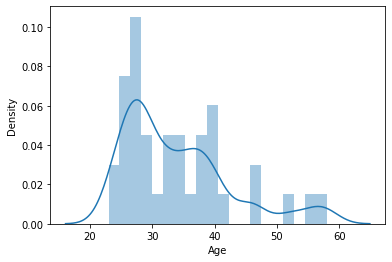

In [ ]:
sns.distplot(df_female['Age'], bins=20)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


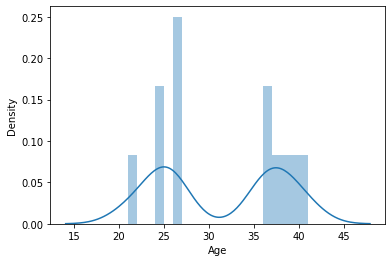

In [ ]:
sns.distplot(df_male['Age'], bins=20)

In [ ]:
df_male['Age'].unique()

array([21, 24, 26, 36, 37, 38, 39, 41])

# Задание 2
 

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/alexandmarkov/sberbank_reboot/main/hw_intermediate/materials/appl_1980_2014.csv')
df

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Adj Close
0,0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...,...,...
8460,8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
8461,8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8462,8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8463,8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42


Убираем ненужный столбец

In [4]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

Проверяем тип данных в столбцах

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8465 non-null   object 
 1   Open       8465 non-null   float64
 2   High       8465 non-null   float64
 3   Low        8465 non-null   float64
 4   Close      8465 non-null   float64
 5   Volume     8465 non-null   int64  
 6   Adj Close  8465 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.1+ KB


преобразуем столбец Date в тип datetime

In [6]:
df['Date'] =  pd.to_datetime(df['Date'], format='%Y-%m-%d')

Устанавливаем дату в качестве индекса

In [7]:
df.set_index('Date', inplace=True)

Проверяем, есть ли повторяющиеся даты. Если будет 1, то нет повторяющихся)

In [ ]:
len(df.index)/len(df.index.unique())

1.0

Получаем последний рабочий день каждого месяца.
Мы рассматриваем биржевые данные, следовательно все даты, которые есть в датасете - рабочие дни. Поэтому задача сводится к нахождению последнего дня в датасете для каждого месяца

In [8]:
import datetime

In [9]:
df['month'] = df.index.map(lambda x: datetime.date(x.year, x.month, 1))

In [10]:
df[['month']].reset_index().groupby(['month']).max()

,Date
month,
1980-12-01,1980-12-31
1981-01-01,1981-01-30
1981-02-01,1981-02-27
1981-03-01,1981-03-31
1981-04-01,1981-04-30
...,...
2014-03-01,2014-03-31
2014-04-01,2014-04-30
2014-05-01,2014-05-30


Разница в днях между самым давним и последним днем

In [ ]:
(max(df.index) - min(df.index)).days

12261

Сколько месяцев есть в данных

In [ ]:
df['month'].unique().shape[0]

404

Строим значение Adj Close

In [14]:
import matplotlib.pyplot as plt

In [ ]:
df

,Open,High,Low,Close,Volume,Adj Close,month
Date,,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35,2014-07-01
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97,2014-07-01
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03,2014-07-01
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48,2014-07-01
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52,2014-07-01
...,...,...,...,...,...,...,...
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41,1980-12-01
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40,1980-12-01
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39,1980-12-01


Text(0, 0.5, 'Adj Close')

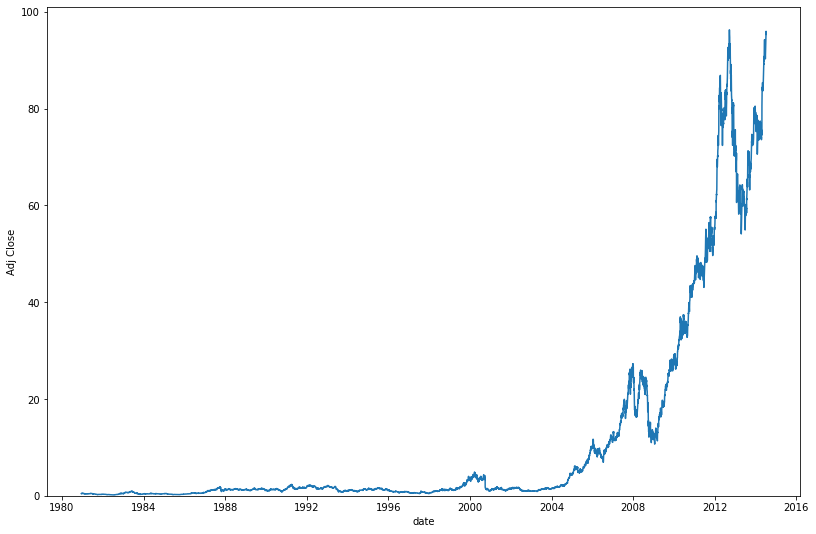

In [ ]:
plt.figure(figsize=(13.5,9))
plt.plot(df.index, df['Adj Close'])
plt.ylim(0)
plt.xlabel('date')
plt.ylabel('Adj Close')

Посмотрим на 1 разность значений Adj Close. Данные возьмем с 2010 года (совсем старые нет смысла брать).

In [11]:
%pylab inline
import numpy as np
from scipy import stats
from scipy.stats import norm, skew

Populating the interactive namespace from numpy and matplotlib


In [12]:
df[df['month']>=datetime.date(2009, 1, 1)]

,Open,High,Low,Close,Volume,Adj Close,month
Date,,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35,2014-07-01
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97,2014-07-01
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03,2014-07-01
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48,2014-07-01
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52,2014-07-01
...,...,...,...,...,...,...,...
2009-01-08,90.43,93.15,90.04,92.70,168375200,12.66,2009-01-01
2009-01-07,91.81,92.50,90.26,91.01,188262200,12.43,2009-01-01
2009-01-06,95.95,97.17,92.39,93.02,322327600,12.70,2009-01-01


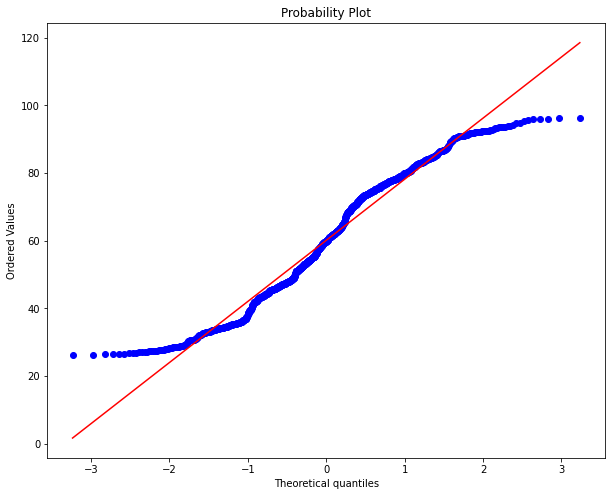

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


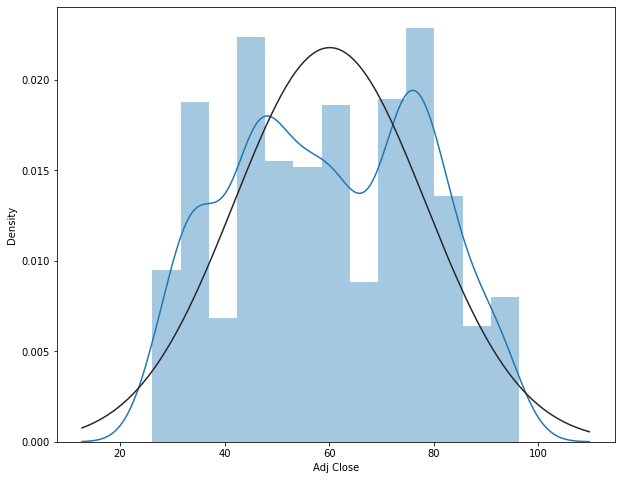

In [16]:
fig, ax = plt.subplots(figsize=(10,8))
stats.probplot(df[df['month']>=datetime.date(2010, 1, 1)]['Adj Close'], dist="norm", plot=pylab)
pylab.show()
fig, ax = plt.subplots(figsize=(10,8))
sns.distplot(df[df['month']>=datetime.date(2010, 1, 1)]['Adj Close'] , fit=norm)

Text(0, 0.5, 'Adj Close')

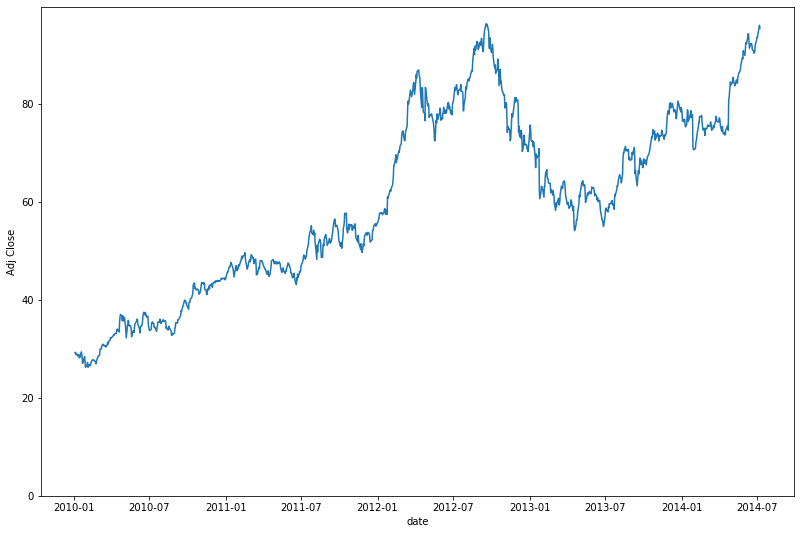

In [ ]:
plt.figure(figsize=(13.5,9))
plt.plot(df[df['month']>=datetime.date(2010, 1, 1)].index, df[df['month']>=datetime.date(2010, 1, 1)]['Adj Close'])
plt.ylim(0)
plt.xlabel('date')
plt.ylabel('Adj Close')

In [18]:
df_month = df[['month', 'Adj Close']].groupby(['month']).median()

In [22]:
df_month = df_month[df_month.index>=datetime.date(2010, 1, 1)]

Text(0, 0.5, 'Adj Close')

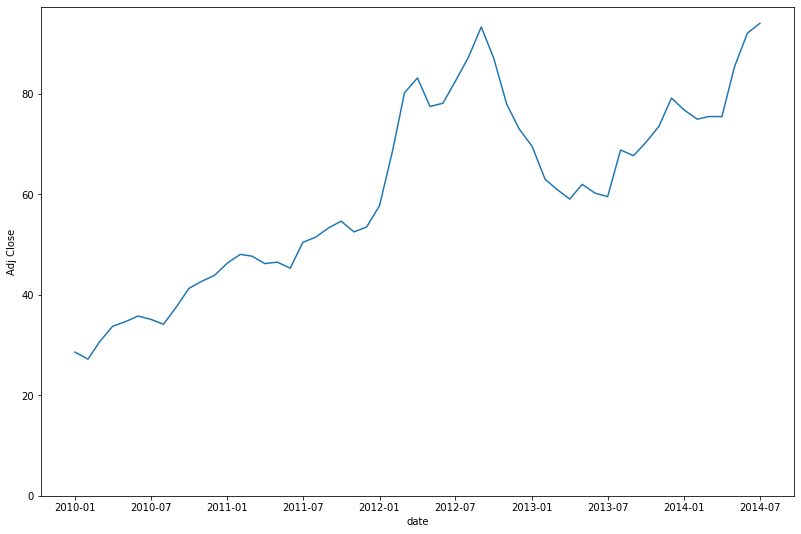

In [23]:
plt.figure(figsize=(13.5,9))
plt.plot(df_month.index, df_month['Adj Close'])
plt.ylim(0)
plt.xlabel('date')
plt.ylabel('Adj Close')

In [35]:
df_month['lag_1'] = df_month['Adj Close'] - df_month['Adj Close'].shift(1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Adj Close')

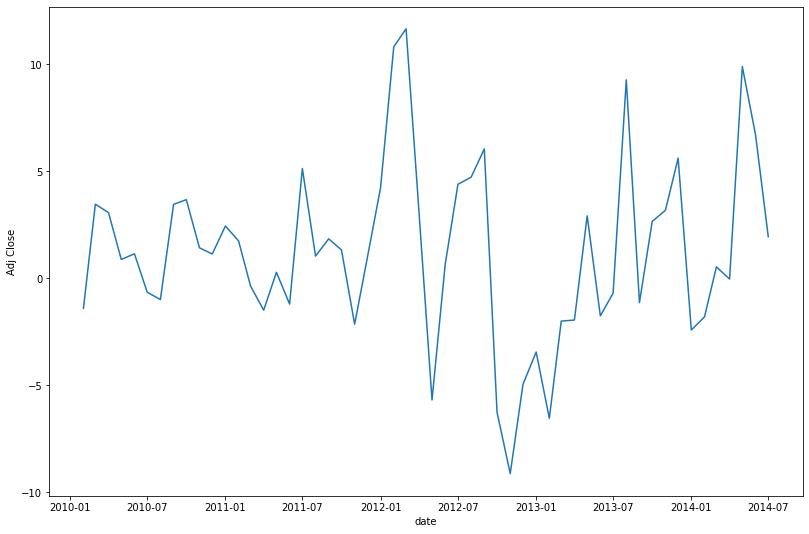

In [36]:
plt.figure(figsize=(13.5,9))
plt.plot(df_month.index, df_month['lag_1'])
plt.xlabel('date')
plt.ylabel('Adj Close')

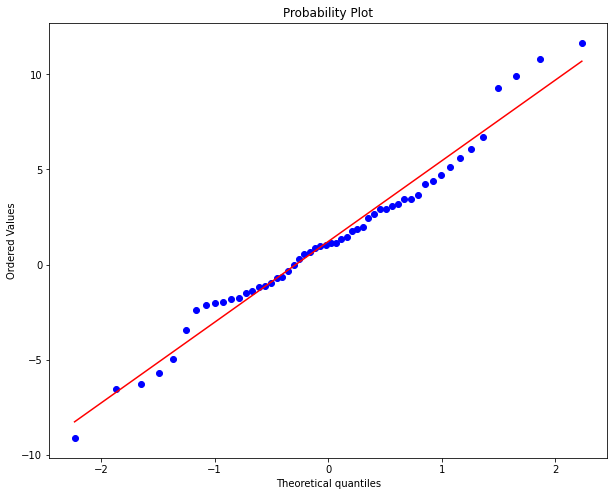

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


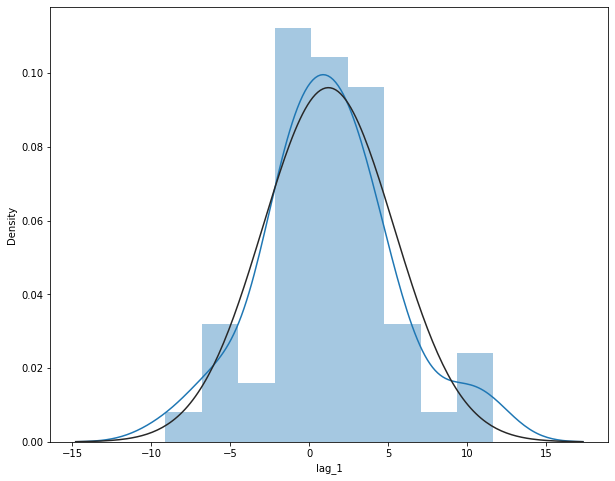

In [37]:
fig, ax = plt.subplots(figsize=(10,8))
stats.probplot(df_month['lag_1'][1:], dist="norm", plot=pylab)
pylab.show()
fig, ax = plt.subplots(figsize=(10,8))
sns.distplot(df_month['lag_1'][1:] , fit=norm)